In [65]:
import pandas as pd

In [66]:
data = pd.read_csv('Live.csv')
data.isnull().sum()

status_id              0
status_type            0
status_published       0
num_reactions          0
num_comments           0
num_shares             0
num_likes              0
num_loves              0
num_wows               0
num_hahas              0
num_sads               0
num_angrys             0
Column1             7050
Column2             7050
Column3             7050
Column4             7050
dtype: int64

In [67]:
data.status_type.unique()

array(['video', 'photo', 'link', 'status'], dtype=object)

In [68]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
data['status_type']=le.fit_transform(data.status_type)


In [69]:
data = data.drop(['Column1','Column2','Column3','Column4','status_id','status_published'],axis=1)

In [70]:
col = data.columns

In [71]:

from sklearn.preprocessing import MinMaxScaler
ms = MinMaxScaler()
data = ms.fit_transform(data)


In [72]:
data = pd.DataFrame(data,columns=col)
data.head()

,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,1.000000,0.112314,0.024393,0.076519,0.091720,0.140030,0.010791,0.006369,0.019608,0.0
1,0.333333,0.031847,0.000000,0.000000,0.031847,0.000000,0.000000,0.000000,0.000000,0.0
2,1.000000,0.048195,0.011243,0.016647,0.043312,0.031963,0.003597,0.006369,0.000000,0.0
3,0.333333,0.023567,0.000000,0.000000,0.023567,0.000000,0.000000,0.000000,0.000000,0.0
4,0.333333,0.045223,0.000000,0.000000,0.043312,0.013699,0.000000,0.000000,0.000000,0.0


c:\Users\Hariharan V\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Hariharan V\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Hariharan V\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Hariharan V\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Hariharan V\anaconda3\l

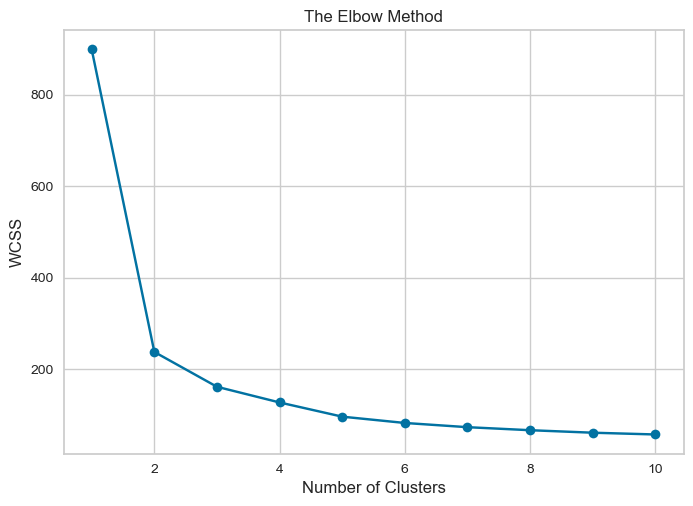

In [73]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

wcss=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i, init='k-means++',random_state=0)
    kmeans.fit(data)
    wcss.append(kmeans.inertia_)

plt.plot(range(1,11),wcss,'-o')
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

# from yellowbrick.cluster import KElbowVisualizer

# Elbow_M = KElbowVisualizer(KMeans(), k=10)
# Elbow_M.fit(data)
# Elbow_M.show()

In [74]:
kmeans = KMeans(n_clusters=3, random_state=10)
data['cluster'] = kmeans.fit_predict(data)


c:\Users\Hariharan V\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [75]:
from sklearn.metrics import silhouette_score,silhouette_samples

n_clusters=3

# The silhouette_score gives the average value for all the samples.
# This gives a perspective into the density and separation of the formed
# clusters
silhouette_avg = silhouette_score(data, data['cluster'])
print("For n_clusters =", n_clusters,
        "The average silhouette_score is :", silhouette_avg)

# Compute the silhouette scores for each sample
sample_silhouette_values = silhouette_samples(data, data['cluster'])
print("For n_clusters =", n_clusters,
        "The  silhouette_score is :", sample_silhouette_values)

For n_clusters = 3 The average silhouette_score is : 0.8954730216274274
For n_clusters = 3 The  silhouette_score is : [0.82339447 0.96047495 0.88164539 ... 0.96988622 0.92231062 0.97261486]


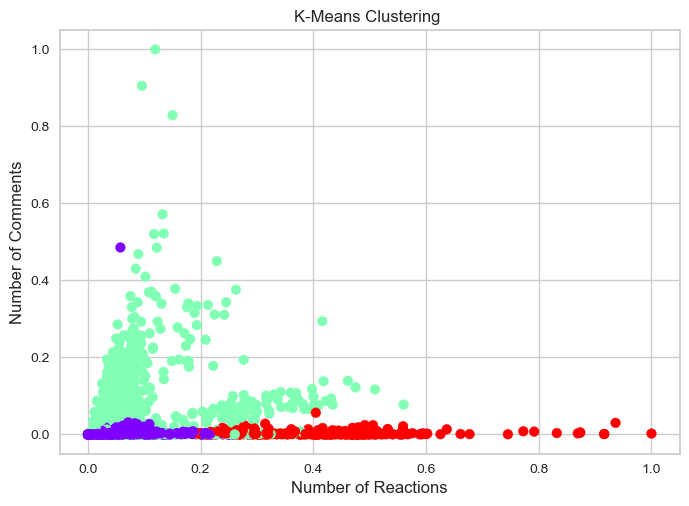

In [76]:
plt.scatter(data['num_reactions'],data['num_comments'],c=data['cluster'], cmap='rainbow')
plt.xlabel('Number of Reactions')
plt.ylabel('Number of Comments')
plt.title('K-Means Clustering ')
plt.show()